In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

%matplotlib inline

In [6]:
df = pd.read_csv("AAPL.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,222.210007,224.800003,220.199997,223.770004,223.770004,29663900
1,2018-10-09,223.639999,227.270004,222.250000,226.869995,226.869995,26891000
2,2018-10-10,225.460007,226.350006,216.050003,216.360001,216.360001,41990600
3,2018-10-11,214.520004,219.500000,212.320007,214.449997,214.449997,53124400
4,2018-10-12,220.419998,222.880005,216.839996,222.110001,222.110001,40337900


In [9]:
dates = df['Date']
prices = df['Open']

In [13]:
date_list = dates.tolist()
price_list = prices.tolist()

In [21]:
#Get the day from the date and set to an integer
day = []
for row in date_list:
    day.append(int(row.split('-')[-1]))

In [25]:
print(day)
print(price_list)

[8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 1, 2, 5, 6]
[222.210007, 223.63999900000002, 225.460007, 214.520004, 220.419998, 221.16000400000001, 218.92999300000002, 222.30000299999998, 217.86000099999998, 218.059998, 219.789993, 215.830002, 222.600006, 217.710007, 215.899994, 219.190002, 211.149994, 216.88000499999998, 219.05000299999998, 209.550003, 204.300003, 201.919998]


In [26]:
#resize day to a 1-d array
day = np.reshape(day, (len(day), 1))

In [27]:
day

array([[ 8],
       [ 9],
       [10],
       [11],
       [12],
       [15],
       [16],
       [17],
       [18],
       [19],
       [22],
       [23],
       [24],
       [25],
       [26],
       [29],
       [30],
       [31],
       [ 1],
       [ 2],
       [ 5],
       [ 6]])

In [28]:
#build different regression models with SVM

svr_len = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_len.fit(day,price_list)
svr_poly.fit(day,price_list)
svr_rbf.fit(day,price_list)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

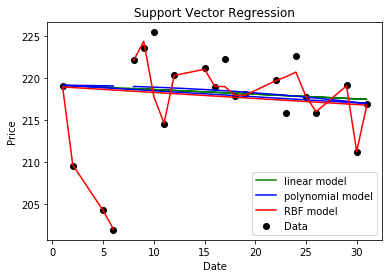

In [29]:
#plot the graph with the different models

plt.scatter(day, price_list, color='black', label='Data' )
plt.plot(day, svr_len.predict(day), color='green', label='linear model')
plt.plot(day, svr_poly.predict(day), color='blue', label='polynomial model')
plt.plot(day, svr_rbf.predict(day), color='red', label='RBF model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()